# Getting Started

We loaded the libraries and got to work


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy import stats

warnings.filterwarnings("ignore")

We first took a look at some basic information about the crime dataset and saw we only know what weapon was used in 75% of the cases.

In [4]:
crime_df = pd.read_csv('data\Crimes_Dataset.csv')
print(crime_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Index_Crimes           10001 non-null  int64  
 1   Date                   10000 non-null  object 
 2   Monster involved       10000 non-null  object 
 3   Days of Investigation  10000 non-null  float64
 4   Region                 9998 non-null   object 
 5   Crime Type             10000 non-null  object 
 6   Crime Weapon           7403 non-null   object 
 7   Time of Day            10000 non-null  object 
 8   Evidence Found         9995 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 703.3+ KB
None


We decided to just ignore the 25% percent where the weapon is missing and remove the rows.
We then decided to clean up the datasets as the names of monsters and evidence were written in uppercase or lowercase in an arbitrary fashion and our plots are case sensitive. We also removed duplicates, just in case.

In [5]:
crime_df.duplicated().sum()
crime_df = crime_df.drop_duplicates()
crime_df = crime_df.dropna()
suspect_df = pd.read_csv('data\Suspects_Dataset.csv')

for column in crime_df.columns:
    if crime_df[column].dtype == 'object': 
        crime_df[column] = crime_df[column].str.title()  

for column in suspect_df.columns:
    if suspect_df[column].dtype == 'object': 
        suspect_df[column] = suspect_df[column].str.title()  

One of the clues we have is the weapon used in the case was a knife, so we decided to graph a count plot for the knife for each monster.

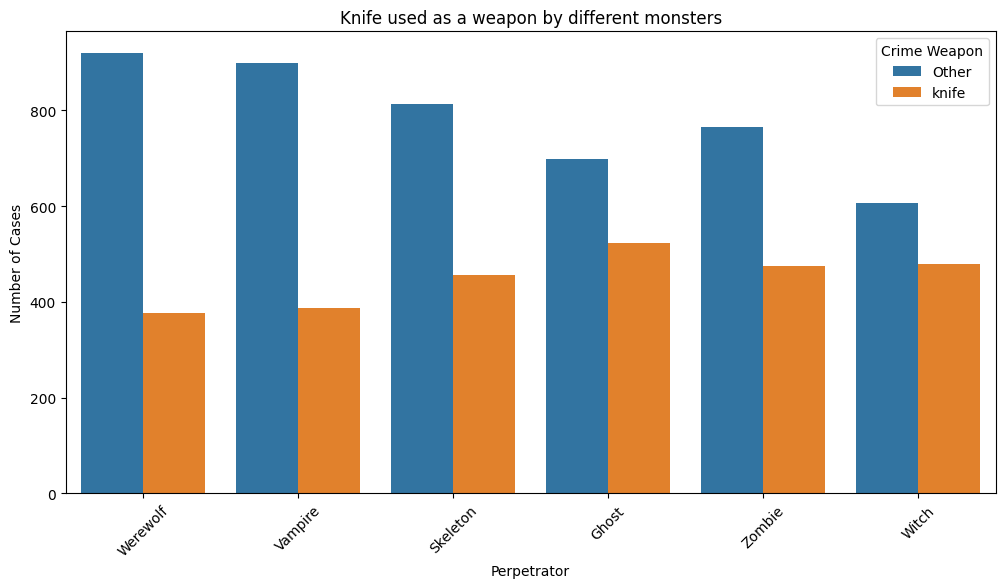

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Monster involved', data=crime_df, hue=(crime_df['Crime Weapon'] == 'knife'))
plt.title('Knife used as a weapon by different monsters')
plt.xlabel('Perpetrator')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.legend(title='Crime Weapon', labels=['Other', 'knife'])
plt.show()

The ghost seems to use the knife a bit more than the others, but the distribution is fairly uniform and doesn't provide us with any hints.
Let's plot the bones...

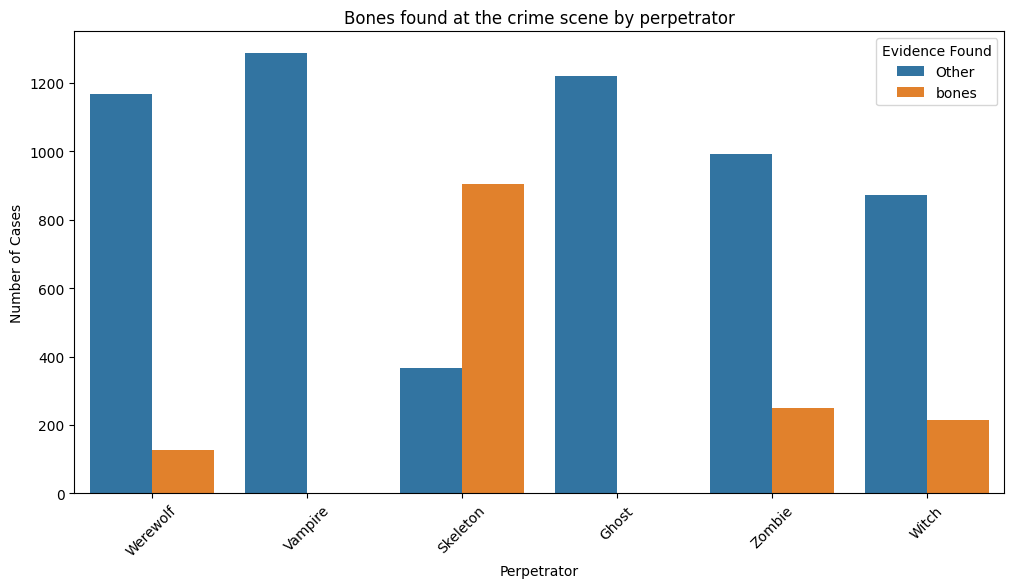

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Monster involved', data=crime_df, hue=(crime_df['Evidence Found'] == 'bones'))
plt.title('Bones found at the crime scene by perpetrator')
plt.xlabel('Perpetrator')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
plt.legend(title='Evidence Found', labels=['Other', 'bones'])
plt.show()

Okay, this potentially excludes the vampire and the ghost. The skeleton seems like a likely suspect.

Who likes to commit crime in the village, though
